# 图像的几何变换

## 图像缩放
缩放只是调整图像大小。OpenCV中的cv.resize()函数，可以指定图像的大小、缩放比例。

![](images/2023-08-11-17-07-14.png)

常用的插值方法：

![](images/2023-08-11-17-07-33.png)

要缩小图像，通常使用INTER_AREA插值看起来最好，而要放大图像，它通常最好使用INTER_CUBIC（慢速）或INTER_LINEAR（更快效果也不错）。

### 按比例缩放

指定图像沿着水平、垂直方向的缩放比例，并查看图像尺寸。

In [2]:
import cv2 as cv
import numpy as np
 
img = cv.imread("exp_images/sudoku.png")
res = cv.resize(img,None,fx=2,fy=2,interpolation = cv.INTER_CUBIC)
 
print(img.shape)
print(res.shape)

(563, 558, 3)
(1126, 1116, 3)


### 指定图像大小

也可以直接给定图像的长宽，并且查看图像尺寸。

In [4]:
img = cv.imread("exp_images/sudoku.png")
height, width = img.shape[:2]
res = cv.resize(img, (2*width, 2*height), interpolation = cv.INTER_CUBIC)
 
print(img.shape)
print(img.shape)

(563, 558, 3)
(563, 558, 3)


## 图像翻转
OpenCV中提供cv.flip()函数使图片围绕垂直、水平或两个轴翻转2D阵列。

![](images/2023-08-11-17-14-36.png)

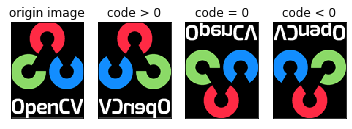

In [8]:
import matplotlib.pyplot as plt

img = cv.imread("exp_images/logo.png")
img1 = cv.flip(img,1)
img2 = cv.flip(img,0)
img3 = cv.flip(img,-1)

plt.subplot(141),plt.imshow(img[:,:,::-1]),plt.title("origin image")
plt.xticks([]),plt.yticks([])
plt.subplot(142),plt.imshow(img1[:,:,::-1]),plt.title("code > 0")
plt.xticks([]),plt.yticks([])
plt.subplot(143),plt.imshow(img2[:,:,::-1]),plt.title("code = 0")
plt.xticks([]),plt.yticks([])
plt.subplot(144),plt.imshow(img3[:,:,::-1]),plt.title("code < 0")
plt.xticks([]),plt.yticks([])
plt.show()



## 图像变换
OpenCV提供了两个转换函数cv.warpAffine()和cv.warpPerspective()，您可以使用它们进行各种转换。cv.warpAffine()采用2x3转换矩阵，而cv.warpPerspective()采用3x3转换矩阵作为输入。

![](images/2023-08-11-17-24-26.png)

常见的2D图像变换主要包括基于2x3矩阵的仿射变换和基于3x3矩阵的透视变换。

### 仿射变换
仿射变换是一种二维坐标到二维坐标之间的线性变换，它保持了二维图形的“平直性”（即：直线经过变换之后依然是直线）和“平行性”（即：二维图形之间的相对位置关系保持不变，平行线依然是平行线，且直线上点的位置顺序不变）因此非共线的三个对应点便可确定唯一的一个仿射变换，线性变换4个自由度+平移2个自由度→仿射变换自由度为6。

![](images/2023-08-11-17-25-17.png)

OpenCV仿射变换函数cv.warpAffine()。

![](images/2023-08-11-17-25-45.png)

空间变换中的仿射变换对应着五种变换，平移，缩放，旋转等。而这由原图像转变到变换图像的过程，可以用仿射变换矩阵进行描述。而这个变换过程可以用一个2*3的矩阵与原图进行相乘得到。

![](images/2023-08-11-17-26-31.png)

在OpenCV提供了cv.getRotationMatrix2D()函数来计算三对相应点的仿射变换矩阵。

![](images/2023-08-11-17-26-51.png)

我们在图像上取三个点及我们变换的目标点，参考下列代码：

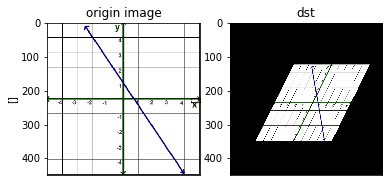

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("exp_images/drawing.png")
rows,cols = img.shape[:2]
# 变换前的三个点
pts1 = np.float32([[50,50],[450,50],[450,450]])
# 变换后的三个点
pts2 = np.float32([[200,150],[400,150],[300,350]])
# 生成变换矩阵
M = cv.getAffineTransform(pts1, pts2)
# 仿射变换
dst = cv.warpAffine(img,M,(cols, rows))

plt.subplot(121),plt.imshow(img[:,:,::-1]),plt.title("origin image")
plt.xticks([]),plt.ylabel([])
plt.subplot(122),plt.imshow(dst[:,:,::-1]),plt.title("dst")
plt.xticks([]),plt.ylabel([])
plt.show()



### 平移

![](images/2023-08-11-17-34-58.png)

平移图片，我们需要定义下面这样一个矩阵，t_x,t_y是向x和y方向平移的距离：

![](images/2023-08-11-17-35-27.png)

平移是用仿射变换函数cv.warpAffine()实现的：

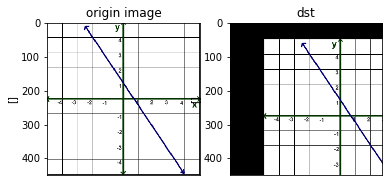

In [14]:
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img[:,:,::-1]),plt.title("origin image")
plt.xticks([]),plt.ylabel([])
plt.subplot(122),plt.imshow(dst[:,:,::-1]),plt.title("dst")
plt.xticks([]),plt.ylabel([])
plt.show()

### 旋转

![](images/2023-08-11-17-39-11.png)

旋转和平移一样，也是用仿射变换实现的，因此也需要定义一个变换矩阵。OpenCV直接提供了cv.getRotationMatrix2D()函数来生成这个矩阵。

![](images/2023-08-11-17-39-37.png)

参考下面代码，使图片以图像中心点旋转45度，大小缩小一半。



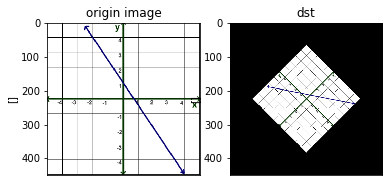

In [15]:
M = cv.getRotationMatrix2D(((cols)/2.0,(rows)/2.0),45,0.5)
dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img[:,:,::-1]),plt.title("origin image")
plt.xticks([]),plt.ylabel([])
plt.subplot(122),plt.imshow(dst[:,:,::-1]),plt.title("dst")
plt.xticks([]),plt.ylabel([])
plt.show()

### 透视变换
透视变换的本质是将二维图像投影到一个新三维视平面上，然后再转换到二位坐标下所以也叫投影映射。

![](images/2023-08-11-17-41-08.png)

仿射变换后依然是平行四边形，并不能做到任意的变换。透视变换与之相比更灵活，变换后会产生一个新的四边形，但不一定是平行四边形，所以需要非共线的四个点才能唯一确定。仿射变换为透视变换的一种特殊变换。

![](images/2023-08-11-17-41-23.png)

OpenCV提供了透视变换函数

![](images/2023-08-11-17-41-48.png)

对于透视变换，需要3x3的变换矩阵。即使在转换后，直线也将保持直线。要找到此变换矩阵，需要在输入图像上的4个点在目标图像上也有对应的点。这四个点中，其中三个不能共线。然后可以通过函数cv.getPerspectiveTransform找到变换矩阵。

![](images/2023-08-11-17-42-59.png)


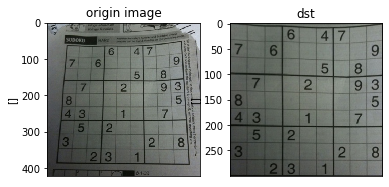

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("exp_images/sudoku.jpg")
# 输入图像点
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
# 目标图像点
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img[:,:,::-1]),plt.title("origin image")
plt.xticks([]),plt.ylabel([])
plt.subplot(122),plt.imshow(dst[:,:,::-1]),plt.title("dst")
plt.xticks([]),plt.ylabel([])
plt.show()